In [1]:
#2 Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\alexk\Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path,'soccer.csv'))

In [4]:
#3 Clean your data so that it’s ready for analysis
df.head()

,Unnamed: 0,season,date,league_id,league,team1,team2,spi1,spi2,prob1,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,total_goals,goals category
0,0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,average scoring
1,1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,average scoring
2,2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,average scoring
3,3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,low scoring
4,4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,average scoring


In [35]:
df = df[df['score1'].notna()]

In [36]:
df['team_ranking_combined']=df['spi1']+df['spi2']

<ipython-input-36-627b899e21e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_ranking_combined']=df['spi1']+df['spi2']


In [37]:
df['team_difference']=df['spi1']-df['spi2']

<ipython-input-37-9a4e75006370>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_difference']=df['spi1']-df['spi2']


In [38]:
df['goal_difference']=df['score1']-df['score2']

<ipython-input-38-c1438cb62fe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['goal_difference']=df['score1']-df['score2']


In [39]:
df.isnull().sum()

Unnamed: 0                   0
season                       0
date                         0
league_id                    0
league                       0
team1                        0
team2                        0
spi1                         0
spi2                         0
prob1                        0
prob2                        0
probtie                      0
proj_score1                  0
proj_score2                  0
importance1               5322
importance2               5322
score1                       0
score2                       0
xg1                      20114
xg2                      20114
nsxg1                    20114
nsxg2                    20114
adj_score1               20114
adj_score2               20114
total_goals                  0
goals category               0
team_ranking_combined        0
team_difference              0
goal_difference              0
dtype: int64

In [40]:
df.head()

,Unnamed: 0,season,date,league_id,league,team1,team2,spi1,spi2,prob1,...,xg2,nsxg1,nsxg2,adj_score1,adj_score2,total_goals,goals category,team_ranking_combined,team_difference,goal_difference
0,0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,...,NaN,NaN,NaN,NaN,NaN,2.0,average scoring,101.98,1.14,2.0
1,1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,...,NaN,NaN,NaN,NaN,NaN,2.0,average scoring,100.64,-7.42,2.0
2,2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,...,NaN,NaN,NaN,NaN,NaN,2.0,average scoring,114.49,5.21,0.0
3,3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,...,NaN,NaN,NaN,NaN,NaN,0.0,low scoring,105.35,0.65,0.0
4,4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,...,NaN,NaN,NaN,NaN,NaN,3.0,average scoring,120.42,-1.56,-1.0


<AxesSubplot:xlabel='team_difference'>

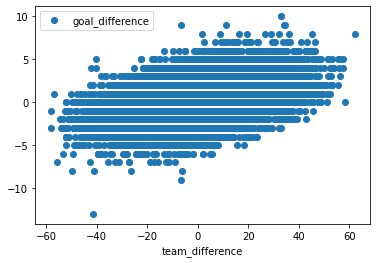

In [41]:
#4 Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
df.plot(x = 'team_difference', y='goal_difference',style='o')

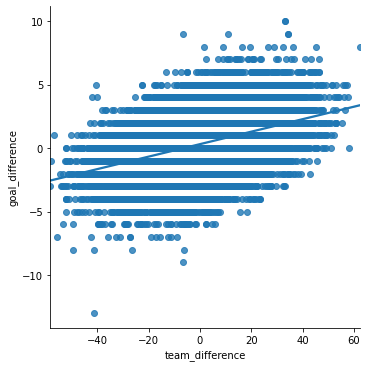

In [42]:
sns.lmplot(x = 'team_difference', y = ('goal_difference'), data = df)

#5 Games between teams that are ranked far apart from each other will end up with a higher goal difference then games between similarly ranked teams

In [43]:
#6 Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
x = df['team_difference'].values.reshape(-1,1)
y = df['goal_difference'].values.reshape(-1,1)

In [44]:
x

array([[  1.14],
       [ -7.42],
       [  5.21],
       ...,
       [ -3.63],
       [ 21.13],
       [-15.42]])

In [45]:
y

array([[2.],
       [2.],
       [0.],
       ...,
       [2.],
       [1.],
       [3.]])

In [46]:
#7 Split the data into two sets: a training set and a test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [47]:
#8 Run a linear regression on the data.
#First, fit the model you created to the training set.

In [52]:
regression = LinearRegression()

In [53]:
regression.fit(x_train, y_train)

LinearRegression()

In [54]:
#Then, create a prediction for y on the test set.
y_predicted = regression.predict(x_test)

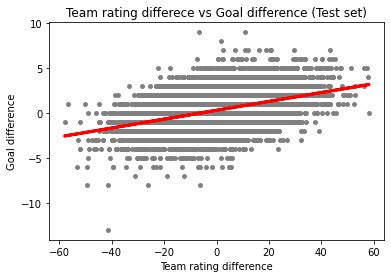

In [56]:
#9 Create a plot that shows the regression line on the test set.
plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Team rating differece vs Goal difference (Test set)')
plot_test.xlabel('Team rating difference')
plot_test.ylabel('Goal difference')
plot_test.show()

#10 Write your own interpretation of how well the line appears to fit the data in a markdown cell.
The line seems to fit the data pretty well, although there are outliers

In [57]:
#11 Check the model performance statistics—MSE and R2.

In [58]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04934852]]
Mean squared error:  2.6042254991932836
R2 score:  0.15365433859623856


In [60]:
y_predicted

array([[-0.99969367],
       [-0.36013687],
       [ 1.15683661],
       ...,
       [ 0.27497857],
       [ 0.65742959],
       [ 0.08794769]])

In [61]:
#12 Compare the predicted y values with the actual y values in a dataframe.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-2.0,-0.999694
1,0.0,-0.360137
2,-2.0,1.156837
3,1.0,0.039586
4,2.0,-1.167479
5,-1.0,-0.018152
6,1.0,-0.813156
7,1.0,0.520734
8,0.0,0.382065
9,-1.0,0.619925


#13 Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.
The model performed reasobly well, correclty predicting the winner of the game most of the time and the predicted golad difference is not that far out from the truth
There is defenite data bias as this prediction model does not account for the home field advantage that can have a noticable effect in soccer

In [62]:
df.to_csv(os.path.join(path, 'soccer2.csv'))